CODE BLOCK: 1

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

CODE BLOCK: 2

In [2]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
device = torch.device("cuda" if cuda else "cpu")

CUDA Available? True


In [3]:
from model import *
from utils import *

CODE BLOCK: 3

In [4]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-7., 7.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

CODE BLOCK: 4

In [5]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=train_transforms)

CODE BLOCK: 5

In [6]:
batch_size = 64

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(train_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

CODE BLOCK: 6

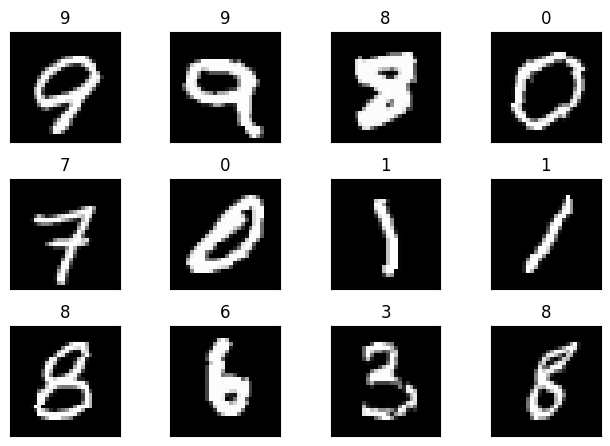

In [7]:
plot_data(train_loader)

CODE BLOCK: 7

CODE BLOCK: 8

In [8]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

CODE BLOCK: 9

CODE BLOCK: 10

In [9]:
model = Net().to(device)
summary(model, input_size= (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             288
              ReLU-2           [-1, 32, 26, 26]               0
       BatchNorm2d-3           [-1, 32, 26, 26]              64
         Dropout2d-4           [-1, 32, 26, 26]               0
            Conv2d-5            [-1, 8, 26, 26]             256
              ReLU-6            [-1, 8, 26, 26]               0
       BatchNorm2d-7            [-1, 8, 26, 26]              16
         Dropout2d-8            [-1, 8, 26, 26]               0
            Conv2d-9           [-1, 10, 24, 24]             720
             ReLU-10           [-1, 10, 24, 24]               0
      BatchNorm2d-11           [-1, 10, 24, 24]              20
        Dropout2d-12           [-1, 10, 24, 24]               0
        MaxPool2d-13           [-1, 10, 12, 12]               0
           Conv2d-14           [-1, 16,

In [10]:
# model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion, train_acc, train_losses)
  test(model, device, test_loader, criterion, test_acc, test_losses)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.2899 Batch_id=937 Accuracy=90.95: 100%|██████████| 938/938 [00:37<00:00, 25.22it/s]


Test set: Average loss: 0.0782, Accuracy: 58677/60000 (97.80%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.0233 Batch_id=937 Accuracy=97.62: 100%|██████████| 938/938 [00:35<00:00, 26.80it/s]


Test set: Average loss: 0.0532, Accuracy: 59059/60000 (98.43%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.0650 Batch_id=937 Accuracy=97.98: 100%|██████████| 938/938 [00:35<00:00, 26.19it/s]


Test set: Average loss: 0.0424, Accuracy: 59228/60000 (98.71%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.1085 Batch_id=937 Accuracy=98.24: 100%|██████████| 938/938 [00:36<00:00, 25.61it/s]


Test set: Average loss: 0.0401, Accuracy: 59239/60000 (98.73%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0203 Batch_id=937 Accuracy=98.32: 100%|██████████| 938/938 [00:36<00:00, 25.61it/s]


Test set: Average loss: 0.0329, Accuracy: 59381/60000 (98.97%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0083 Batch_id=937 Accuracy=98.44: 100%|██████████| 938/938 [00:37<00:00, 25.32it/s]


Test set: Average loss: 0.0299, Accuracy: 59429/60000 (99.05%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0534 Batch_id=937 Accuracy=98.65: 100%|██████████| 938/938 [00:36<00:00, 25.63it/s]


Test set: Average loss: 0.0280, Accuracy: 59480/60000 (99.13%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0058 Batch_id=937 Accuracy=98.66: 100%|██████████| 938/938 [00:37<00:00, 24.93it/s]


Test set: Average loss: 0.0278, Accuracy: 59468/60000 (99.11%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0147 Batch_id=937 Accuracy=98.65: 100%|██████████| 938/938 [00:36<00:00, 25.86it/s]


Test set: Average loss: 0.0268, Accuracy: 59496/60000 (99.16%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0053 Batch_id=937 Accuracy=98.79: 100%|██████████| 938/938 [00:36<00:00, 26.03it/s]


Test set: Average loss: 0.0299, Accuracy: 59422/60000 (99.04%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0176 Batch_id=937 Accuracy=98.74: 100%|██████████| 938/938 [00:36<00:00, 25.94it/s]


Test set: Average loss: 0.0247, Accuracy: 59520/60000 (99.20%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0091 Batch_id=937 Accuracy=98.83: 100%|██████████| 938/938 [00:35<00:00, 26.10it/s]


Test set: Average loss: 0.0215, Accuracy: 59599/60000 (99.33%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0776 Batch_id=937 Accuracy=98.84: 100%|██████████| 938/938 [00:36<00:00, 25.56it/s]


Test set: Average loss: 0.0226, Accuracy: 59549/60000 (99.25%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0025 Batch_id=937 Accuracy=98.90: 100%|██████████| 938/938 [00:36<00:00, 25.50it/s]


Test set: Average loss: 0.0234, Accuracy: 59548/60000 (99.25%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0021 Batch_id=937 Accuracy=98.94: 100%|██████████| 938/938 [00:36<00:00, 25.52it/s]


Test set: Average loss: 0.0203, Accuracy: 59599/60000 (99.33%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0019 Batch_id=937 Accuracy=99.07: 100%|██████████| 938/938 [00:36<00:00, 25.90it/s]


Test set: Average loss: 0.0167, Accuracy: 59709/60000 (99.52%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0034 Batch_id=937 Accuracy=99.15: 100%|██████████| 938/938 [00:36<00:00, 25.51it/s]


Test set: Average loss: 0.0160, Accuracy: 59710/60000 (99.52%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0011 Batch_id=937 Accuracy=99.16: 100%|██████████| 938/938 [00:36<00:00, 25.79it/s]


Test set: Average loss: 0.0146, Accuracy: 59726/60000 (99.54%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0672 Batch_id=937 Accuracy=99.20: 100%|██████████| 938/938 [00:35<00:00, 26.35it/s]


Test set: Average loss: 0.0160, Accuracy: 59703/60000 (99.50%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0025 Batch_id=937 Accuracy=99.24: 100%|██████████| 938/938 [00:36<00:00, 25.70it/s]


Test set: Average loss: 0.0141, Accuracy: 59746/60000 (99.58%)

Adjusting learning rate of group 0 to 1.0000e-03.


CODE BLOCK: 11

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             288
              ReLU-2           [-1, 32, 26, 26]               0
       BatchNorm2d-3           [-1, 32, 26, 26]              64
         Dropout2d-4           [-1, 32, 26, 26]               0
            Conv2d-5            [-1, 8, 26, 26]             256
              ReLU-6            [-1, 8, 26, 26]               0
       BatchNorm2d-7            [-1, 8, 26, 26]              16
         Dropout2d-8            [-1, 8, 26, 26]               0
            Conv2d-9           [-1, 10, 24, 24]             720
             ReLU-10           [-1, 10, 24, 24]               0
      BatchNorm2d-11           [-1, 10, 24, 24]              20
        Dropout2d-12           [-1, 10, 24, 24]               0
        MaxPool2d-13           [-1, 10, 12, 12]               0
           Conv2d-14           [-1, 16,

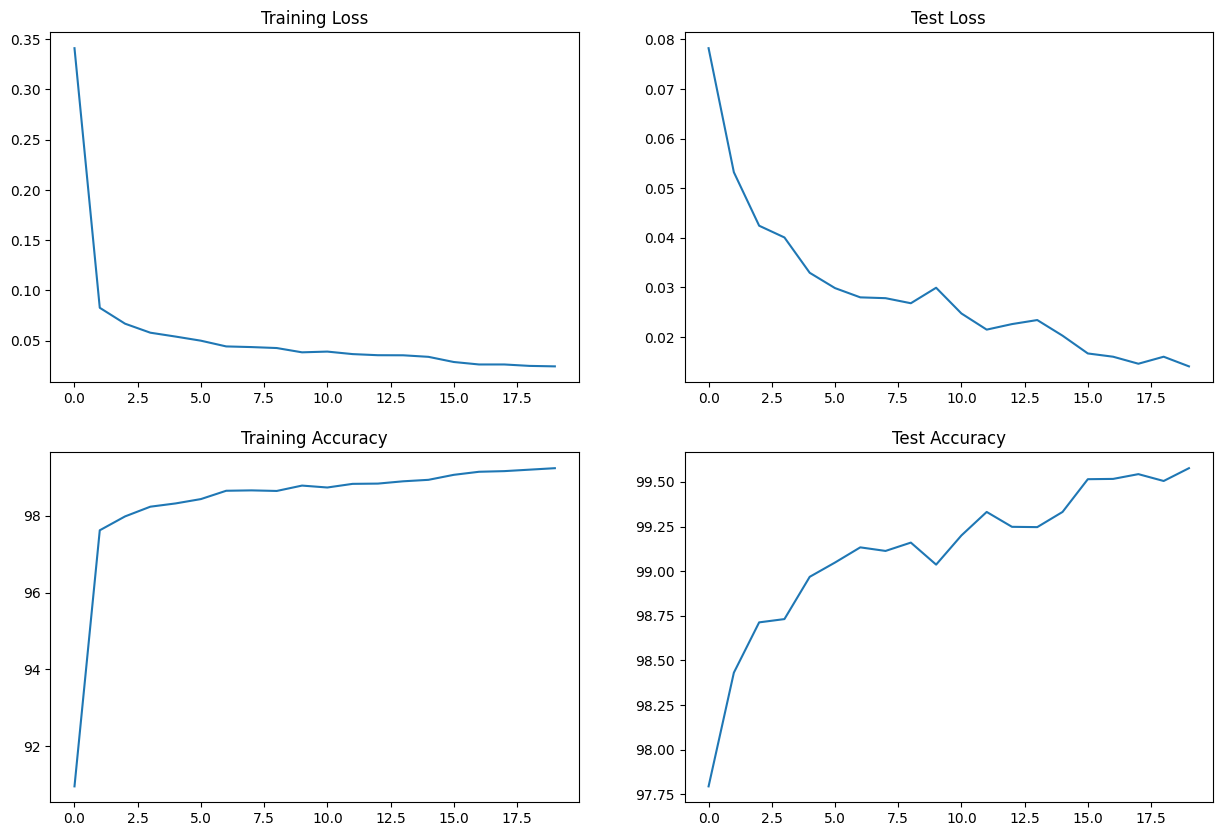

In [11]:
plot_train_test_stats(model, train_losses, train_acc, test_acc, test_losses)

In [25]:
import math

def negative_log_likelihood_loss(activations, target_class):
  """Calculates the negative log-likelihood loss for a given set of activations and target class."""
  log_likelihood = 0
  for i in range(len(activations)):
    if i == target_class:
      log_likelihood += -math.log(activations[i] / sum(activations))
    else:
      log_likelihood += -math.log(1 - activations[i] / sum(activations))
  return -log_likelihood


activations = [10, 8, 3]
target_class = 1
loss = negative_log_likelihood_loss(activations, target_class)
print(loss)

-1.7658587407958979
